In [1]:
import pandas as pd

df = pd.read_csv('processed_data.csv')

columns = df.columns

print(columns)


Index(['Gender', 'Marital_status', 'Pregnant', 'current_drinker',
       'former_drinker_x', 'current_smoker', 'former_drinker_y', 'Aspirin_use',
       'High_Blood_pressure', 'High_Cholestrol', 'Chest_pain',
       'stomach problem', 'Chest Cold', 'Pneu_flu_ear infection', 'HIV',
       'Diabetes', 'Difficulty Hearing', 'Difficulty Seeing', 'Hepatitis_B',
       'Hepatitis_C', 'hospitalized', 'Weak Kidney', 'Kidney Stone',
       'Pesticide_used', 'anemia', 'overweight', 'blood_transfusion',
       'arthritis', 'gout', 'congestive heart failure',
       'coronary heart disease', 'heart attack', 'stroke', 'emphysema',
       'thyroid', 'chronic bronchitis', 'liver problem', 'COPD', 'jaundice',
       'cancer', 'kidney_cancer', 'Farmer', 'smoked_in_pregnancy',
       'Prescribed_medicine', 'HC2', 'HC3', 'HC4', 'HC5',
       'days_hospitalised_1', 'days_hospitalised_2', 'days_hospitalised_3',
       'days_hospitalised_4', 'days_hospitalised_5', 'days_hospitalised_6',
       'Age', 'Env_S

In [2]:
df

,Gender,Marital_status,Pregnant,current_drinker,former_drinker_x,current_smoker,former_drinker_y,Aspirin_use,High_Blood_pressure,High_Cholestrol,...,surplus specimen_B_2y_wts,Imidacloprid,Acetamiprid,Clothianidin,Thiacloprid,5-Hydroxyimidacloprid,N-Desmethylacetamiprid,surplus specimen_GLYP_2y_wts,Glyphosate,UACR
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.495505,-0.127305,-0.057047,-0.097582,-0.023447,-0.163357,-0.348441,-0.359301,-0.346669,0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.404546,0.413754,-0.057047,-0.097582,-0.023447,0.241930,0.764528,-0.794029,-0.442560,0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.136210,-0.127305,-0.057047,-0.097582,-0.023447,0.102132,-0.348441,-0.017631,0.043225,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-0.858739,-0.127305,-0.057047,-0.097582,-0.023447,-0.163357,-0.139621,-0.794029,-0.223519,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-0.858739,-0.127305,-0.057047,-0.097582,-0.023447,-0.163357,-0.139621,-0.794029,-0.223519,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6216,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,-0.376429,-0.127305,-0.057047,-0.097582,-0.023447,-0.163357,-0.241161,-0.246066,-0.453269,0
6217,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,-0.376429,-0.127305,-0.057047,-0.097582,-0.023447,-0.163357,-0.241161,-0.246066,-0.453269,0
6218,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.655505,-0.127305,-0.057047,-0.097582,-0.023447,-0.163357,-0.348441,-0.511452,1.271317,0
6219,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.163819,-0.127305,-0.057047,-0.097582,-0.023447,-0.117442,-0.348441,-0.794029,-0.486855,0


##### Oversampling with ADASYN with feature selection (SelectKBest) and p significant value:

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE  
from imblearn.over_sampling import ADASYN

X = df.drop('UACR', axis=1)  
y = df['UACR']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

knn_imputer_train = KNNImputer(n_neighbors=5)
X_train_imputed = pd.DataFrame(knn_imputer_train.fit_transform(X_train), columns=X_train.columns)

knn_imputer_test = KNNImputer(n_neighbors=5)
X_test_imputed = pd.DataFrame(knn_imputer_test.fit_transform(X_test), columns=X_test.columns)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test.columns)

adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train)

p = 8 
selector = SelectKBest(score_func=mutual_info_classif, k=p)  # Changed to mutual_info_classif
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = selector.transform(X_test_scaled)

rfe_selector = RFE(estimator=KNeighborsClassifier(n_neighbors=3), n_features_to_select=p)
X_train_rfe = rfe_selector.fit_transform(X_train_selected, y_train_resampled)
X_test_rfe = rfe_selector.transform(X_test_selected)

knn_model = KNeighborsClassifier()  

param_grid = {
    'n_neighbors': [3,5,7,9,11],
    'p': [1,2]
}

grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring='accuracy', cv=5)  
grid_search.fit(X_train_rfe, y_train_resampled)  
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_rfe)

accuracy = accuracy_score(y_test, y_pred)  
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


C:\Users\maste\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\maste\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\maste\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\maste\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\maste\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\maste\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best Hyperparameters: {'n_neighbors': 3, 'p': 1}
Accuracy: 0.8168674698795181
Precision: 0.4960835509138381
Recall: 0.8444444444444444
F1 Score: 0.625


C:\Users\maste\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\maste\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

#### Learning Curve:

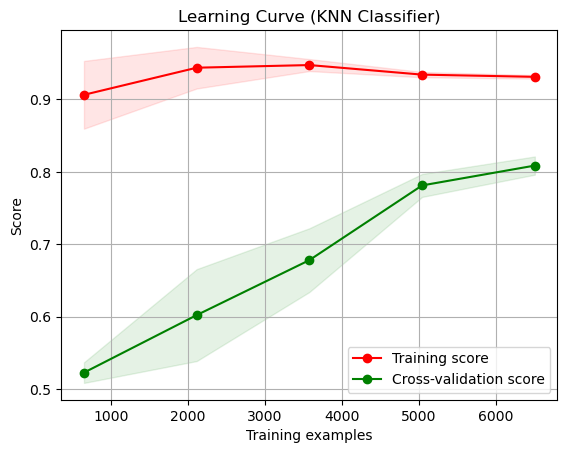

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, cv, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(
        train_sizes, train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std, alpha=0.1, color="r"
    )
    plt.fill_between(
        train_sizes, test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std, alpha=0.1, color="g"
    )

    plt.plot(
        train_sizes, train_scores_mean, 'o-', color="r",
        label="Training score"
    )
    plt.plot(
        train_sizes, test_scores_mean, 'o-', color="g",
        label="Cross-validation score"
    )

    plt.legend(loc="best")
    return plt


cv = 5  
title = "Learning Curve (KNN Classifier)"

plot_learning_curve(
    best_model, title, X_train_rfe, y_train_resampled, cv=cv
)

plt.show()


In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from tabulate import tabulate


param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'p': [1, 2]
}

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, scoring=scoring, refit='accuracy', cv=5)
grid_search.fit(X_train_rfe, y_train_resampled)

results = []
for i, params in enumerate(grid_search.cv_results_['params']):
    results.append({
        'n_neighbors': params['n_neighbors'],
        'p': params['p'],
        'accuracy': grid_search.cv_results_['mean_test_accuracy'][i],
        'precision': grid_search.cv_results_['mean_test_precision_macro'][i],
        'recall': grid_search.cv_results_['mean_test_recall_macro'][i],
        'f1_score': grid_search.cv_results_['mean_test_f1_macro'][i]
    })

df_results = pd.DataFrame(results)

print(tabulate(df_results, headers='keys', tablefmt='psql'))


C:\Users\maste\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\maste\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\maste\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\maste\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\maste\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\maste\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\maste\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\maste\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

+----+---------------+-----+------------+-------------+----------+------------+
|    |   n_neighbors |   p |   accuracy |   precision |   recall |   f1_score |
|----+---------------+-----+------------+-------------+----------+------------|
|  0 |             3 |   1 |   0.808779 |    0.809505 | 0.808858 |   0.808689 |
|  1 |             3 |   2 |   0.805213 |    0.805461 | 0.805221 |   0.805166 |
|  2 |             5 |   1 |   0.778774 |    0.779436 | 0.778869 |   0.778673 |
|  3 |             5 |   2 |   0.770658 |    0.770876 | 0.77071  |   0.770628 |
|  4 |             7 |   1 |   0.758609 |    0.759904 | 0.758784 |   0.758396 |
|  5 |             7 |   2 |   0.751475 |    0.752501 | 0.751633 |   0.751301 |
|  6 |             9 |   1 |   0.7516   |    0.754221 | 0.751874 |   0.751124 |
|  7 |             9 |   2 |   0.746311 |    0.748613 | 0.746573 |   0.745881 |
|  8 |            11 |   1 |   0.739793 |    0.74339  | 0.740125 |   0.739057 |
|  9 |            11 |   2 |   0.727495 

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from operator import itemgetter
from tabulate import tabulate
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = df.drop('UACR', axis=1)  
y = df['UACR']  

def dim_red_using_rfe_knn(X, y, no_of_features):
    model = RandomForestClassifier()  
    reduced_features_estimator = RFE(estimator=model, n_features_to_select=no_of_features)
    reduced_features_estimator.fit(X, y)
    reduced_col_names = reduced_features_estimator.get_support(indices=True)

    return X.iloc[:, reduced_col_names]

def knn_grid_search_with_rfe(n_neighbors_array, p_array, params, X_train, X_test, y_train, y_test, rfe_features):
    for n_neighbors_val in n_neighbors_array:
        for p_val in p_array:
            knn_model = KNeighborsClassifier(n_neighbors=n_neighbors_val, p=p_val)
            knn_model.fit(X_train, y_train)
            
            y_pred = knn_model.predict(X_test)
            
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='macro')
            precision = precision_score(y_test, y_pred, average='macro')
            recall = recall_score(y_test, y_pred, average='macro')
            
            parameters_dict = {'n_neighbors': n_neighbors_val, 'p': p_val, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}
            params.append(parameters_dict)
            
            print(f'n_neighbors:{n_neighbors_val}, p:{p_val}, accuracy:{accuracy}, F1_score:{f1}')

    param_sorted = sorted(params, key=itemgetter('f1_score'), reverse=True)
    df = pd.DataFrame.from_dict(param_sorted)
    print(tabulate(df, headers='keys', tablefmt='psql'))

    opt_hparams = param_sorted[0]
    print('**' * 60)
    print(f'\noptimal hyper-parameters: {opt_hparams}\n')
    print('**' * 60)

n_neighbors_array = [3, 5, 7, 9, 11]
p_array = [1, 2]  
knn_params = []  

X_rfe_knn = dim_red_using_rfe_knn(X, y, 30)

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_rfe_knn, y, test_size=0.2, random_state=2)

knn_grid_search_with_rfe(n_neighbors_array, p_array, knn_params, X_train_knn, X_test_knn, y_train_knn, y_test_knn, rfe_features=30)


C:\Users\maste\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\maste\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

n_neighbors:3, p:1, accuracy:0.927710843373494, F1_score:0.8654241571144441
n_neighbors:3, p:2, accuracy:0.9285140562248996, F1_score:0.8677253730202974


C:\Users\maste\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\maste\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

n_neighbors:5, p:1, accuracy:0.9108433734939759, F1_score:0.8350282742163261
n_neighbors:5, p:2, accuracy:0.9172690763052209, F1_score:0.8443978493449384


C:\Users\maste\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\maste\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

n_neighbors:7, p:1, accuracy:0.8899598393574297, F1_score:0.78953635438196
n_neighbors:7, p:2, accuracy:0.878714859437751, F1_score:0.7737510545527192


C:\Users\maste\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\maste\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

n_neighbors:9, p:1, accuracy:0.8706827309236947, F1_score:0.7427359104449643
n_neighbors:9, p:2, accuracy:0.8674698795180723, F1_score:0.7432408954727654
n_neighbors:11, p:1, accuracy:0.8666666666666667, F1_score:0.7253832171102985
n_neighbors:11, p:2, accuracy:0.8626506024096385, F1_score:0.727981508952289
+----+---------------+-----+------------+------------+-------------+----------+
|    |   n_neighbors |   p |   accuracy |   f1_score |   precision |   recall |
|----+---------------+-----+------------+------------+-------------+----------|
|  0 |             3 |   2 |   0.928514 |   0.867725 |    0.910909 | 0.836863 |
|  1 |             3 |   1 |   0.927711 |   0.865424 |    0.911971 | 0.832908 |
|  2 |             5 |   2 |   0.917269 |   0.844398 |    0.894407 | 0.810948 |
|  3 |             5 |   1 |   0.910843 |   0.835028 |    0.874514 | 0.807026 |
|  4 |             7 |   1 |   0.88996  |   0.789536 |    0.840956 | 0.757908 |
|  5 |             7 |   2 |   0.878715 |   0.77375

C:\Users\maste\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\maste\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim